In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import scipy.integrate as spi
import pylab as pl
#from pylab import *

from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.signal import savgol_filter
import operator
#from pyDOE import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

In [2]:
def coinf_exp1_model(INP,t):  
#     try:
#         beta0=ps['beta0'].value
#         beta1=ps['beta1'].value
# #     beta=np.hstack((ps['beta0'].value,ps['beta1'].value))
#         gamma0=ps['gamma0'].value
#         gamma1=ps['gamma1'].value
#         c=ps['c'].value
#     except:
#         beta0,beta1,gamma0,gamma1,c=ps
        
#     mu=np.array([c/10,c/10,c*gamma1])
#     beta=np.hstack((beta0,beta1))
    
    Y=np.zeros((12))
    V = INP    
    #SS
    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[0]*(V[4]+V[5])+gamma0*V[1]
    
 
    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[1]*(V[4]+V[5])-gamma0*V[1]
    
    #SE 1 measles
    
    Y[2]=beta[1]*V[0]*(V[4]+V[5])-sigma*V[2]-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma0*V[3]
    
    #IE
    
    Y[3]= beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma0*V[3]-sigma*V[3]+beta[1]*V[1]*(V[4]+V[5])
    
    #SI 1 measles
    Y[4]=sigma*V[2]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])-omega[0]*V[4]+gamma0*V[5]-mu[0]*V[4]
    
    
    #II 0 and 1 measles and pathogen
    Y[5]=beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])+sigma*V[3]-gamma0*V[5]-omega[1]*V[5]-mu[1]*V[5]
    
    

    #SX immunosuppressed
    Y[6]=omega[0]*V[2]-gamma1*V[6]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])
    

    
    #IX
    Y[7]=omega[1]*V[5]+beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma1*V[7]-mu[2]*V[7]-gamma0*V[7]
    

    #SR
    Y[8]=gamma1*V[6]+gamma0*V[9]-beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])
    
   
    
    #IR
    Y[9]=beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma1*V[7]-gamma0*V[9]
    
    Y[10]=mu[0]*V[4]
    Y[11]=mu[1]*V[5]+mu[2]*V[7]

    
    return Y   # For odeint



In [72]:
N=2618
beta0=0.05/N
beta1= 0.6/N
beta=np.array([beta0,beta1])
gamma0=1/50
gamma1=1/30
c1=0.01
c2=0.01
c3=0.2 
sigma=0.16
omega0=  1/10
omega1=  1/10
omega=np.array([omega0,omega1])
IS0=100
SE0=2
IE0=0
SI0=0
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
mu=np.array([c1*omega[0],c2*omega[1],c3*gamma1])

# beta0:   0.98784668 (init = 1.2)
#     beta1:   0.33159226 (init = 0.4)
#     gamma0:  0.34799231 (init = 0.1)
#     gamma1:  0.24078635 (init = 0.1)
#     c1:      0.06799435 (init = 0.1)
#     c2:      0.07178437 (init = 0.1)
#     c3:      0.10000000 (init = 0.1)
#     sigma:   0.16058352 (init = 0.1)
#     omega0:  0.11031387 (init = 0.1)
#     omega1:  0.10000000 (init = 0.1)
TS=1.0
ND=200.0
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
ts_len=160

In [73]:
RES = spi.odeint(coinf_exp1_model,INPUT,t_range)
res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]

x=np.array((res_measles,res_coinf))

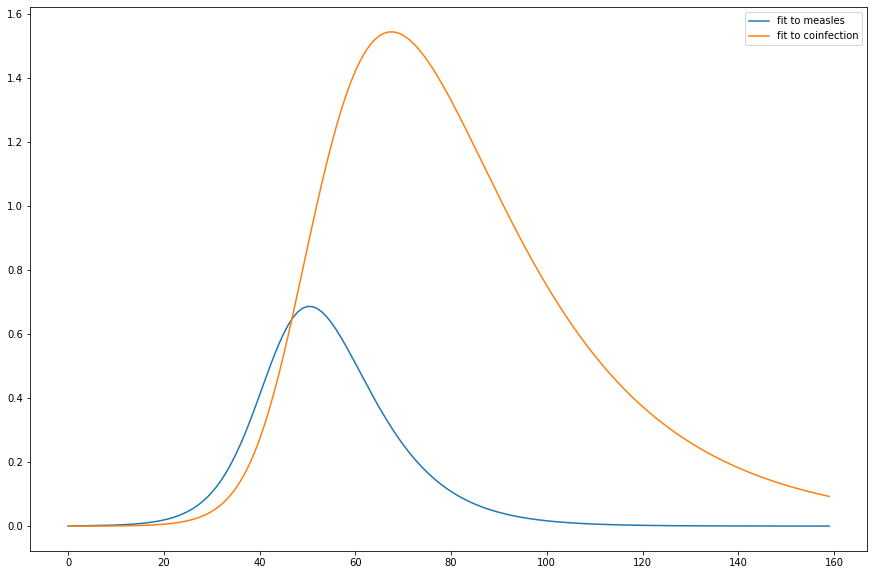

In [74]:
plt.figure(figsize=(15,10))

#plt.plot(time_series[0],label="Measles")
#plt.plot(time_series[1],label="Coinfection")
plt.plot(x[0],label="fit to measles")
plt.plot(x[1],label="fit to coinfection")

plt.legend()
plt.show()